In [0]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=1000, shuffle=True)

In [0]:
class Everything(nn.Module):
  def __init__(self):
    super(Everything, self).__init__()
    self.hidden1=nn.Linear(784,128)
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
  def forward(self,x):
    x=torch.tanh(self.hidden1(x))
    x=torch.tanh(self.hidden2(x))
    x=F.log_softmax(self.output(x),dim=1)
    #x=self.output(x)
    return x

In [6]:
epochs=5
model=Everything()
optimizer=optim.SGD(model.parameters(),lr=0.1)
criterion=nn.NLLLoss()
for i in range(epochs):
  training_loss=0
  for images,labels in train_loader:
    #print(images.shape)
    train_examples_data1=images.view(32,784)
    
    optimizer.zero_grad()

    logProbs=model(train_examples_data1)

    loss=criterion(logProbs,labels)

    training_loss+=loss

    loss.backward()
    
    optimizer.step()
  print(training_loss)

tensor(465.9428, grad_fn=<AddBackward0>)
tensor(194.7387, grad_fn=<AddBackward0>)
tensor(133.9979, grad_fn=<AddBackward0>)
tensor(95.8441, grad_fn=<AddBackward0>)
tensor(68.8063, grad_fn=<AddBackward0>)


In [0]:
test_examples=enumerate(test_loader)
batch_idx,(test_examples_data,test_examples_targets)=next(test_examples)
test_examples_data1=test_examples_data.view(1000,1,784)

In [0]:
def PrintProbOutput(data):
  data=data.detach().numpy()
  x=torch.Tensor(range(0,10))
  print (data)
  print (x)
  #plt.bar(x.view(1,10),Probs)
  #sns.distplot(a=Probs,hist=True)
  plt.scatter(x.view(1,10),data)
  plt.ylim(0,1)
  plt.show

Text(0.5, 1.0, 'tensor(2)')

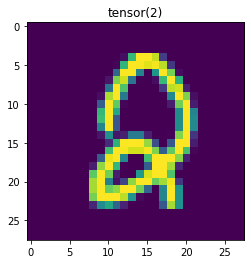

In [36]:
number=443
plt.imshow(test_examples_data[number][0])
plt.title(test_examples_targets[number])

[[1.4775200e-03 1.1438439e-06 7.2821307e-01 1.0792210e-04 1.4750504e-05
  5.5783625e-05 6.6492520e-04 3.1124867e-07 2.6941317e-01 5.1357703e-05]]
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


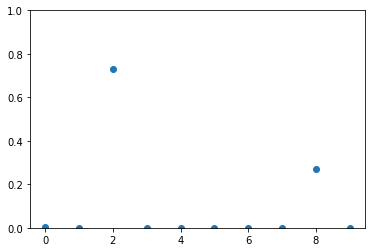

In [37]:
with torch.no_grad():
  output=model(test_examples_data1[number])
  output=F.softmax(output,dim=1)
PrintProbOutput(output)

In [0]:
def CalculatedOutput(output):
  highest=-1
  rank=-1
  for i in range(len(output[0])):
    if output[0][i]>highest:
      highest=output[0][i]
      rank=i
  return np.array([rank])
def Accuracy():
  calc_output=np.array([])
  for i in test_examples_data1:
    with torch.no_grad():
      output1=model(i)
      output1=F.softmax(output1,dim=1)
    #print(CalculatedOutput(output1))
    calc_output=np.append(calc_output,CalculatedOutput(output1))
  exp_output=test_examples_targets.numpy() #Converts into an numpy array
  correct=0
  for i in range(len(calc_output)):
    if calc_output[i]==exp_output[i]:
      correct+=1
  accuracy=(correct/1000)*100
  return accuracy

In [101]:
Accuracy()

96.89999999999999